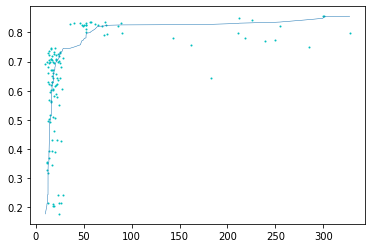

In [442]:
import pandas as pd
from numpy import genfromtxt
import numpy as np
from scipy.interpolate import *

hyper = genfromtxt('test.csv', delimiter=',')
#hyper=np.array(bayes)
def minof(a):
    for j in range(1):
        ma = 0;
        ta = 0;
        for i in range(128):
            if(ma<a[i,2]):
                ta = a[i,0]
            ma = max(ma,a[i,2]) 
            a[i,2] = ma
            a[i,0] = ta

            
#plt.plot(hyper[:,1],hyper[:,2],'r.')
plt.plot(hyper[:,1],hyper[:,0],'co',markersize=1)

a = np.sort(hyper, axis=0)

x = InterpolatedUnivariateSpline(a[:,1],a[:,0])
f=UnivariateSpline(a[:,1],a[:,0])
g=interp1d(a[:,1],a[:,0])
minof(hyper[::-1,])
t=np.arange(128)
import matplotlib.pyplot as plt

#plt.plot(t, hyper[:,0], 'r-',label="test_mean accuracy")
#plt.plot(t, hyper[:,1], 'b-',label="test_mean accuracy")
#plt.plot(t, hyper[:,2], 'c-',label="test_mean accuracy")

#plt.plot(hyper[:,1],hyper[:,2])
plt.plot(a[:,1],x(a[:,1]),linewidth=0.5)



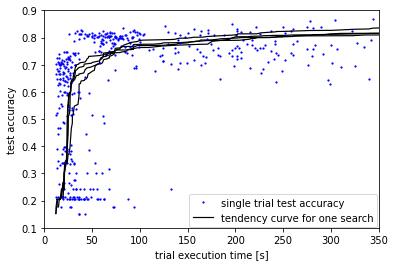

<Figure size 432x288 with 0 Axes>

In [446]:
a = np.sort(hyper, axis=0)
b = np.sort(bayes, axis=0)
c = np.sort(ax, axis=0)
d = np.sort(ng, axis=0)
e = np.sort(bohb, axis=0)
f = np.sort(ran, axis=0)
g = np.sort(zoo, axis=0)

def timep(d,name):
    if name =='zoo':
        for i in range(5):
            a = np.sort(d, axis=0)
            x = InterpolatedUnivariateSpline(a[::,1+3*i],1-a[::-1,0+3*i])
            if(i==0):
                plt.plot(d[:,1+3*i],1-d[:,0+3*i],'bo',markersize=1,label="single trial test accuracy")
                plt.plot(a[:,1+3*i],x(a[:,1+3*i]),'k',linewidth=1,label="tendency curve for one search")
            else:
                plt.plot(d[:,1+3*i],1-d[:,0+3*i],'bo',markersize=1)
                plt.plot(a[:,1+3*i],x(a[:,1+3*i]),'k',linewidth=1)
        
    else:
        for i in range(5):
            if(name == "bohb" and i ==4): 
                break
            a = np.sort(d, axis=0)
            x = InterpolatedUnivariateSpline(a[:,1+3*i],a[:,0+3*i])
            if(i==0):
                plt.plot(d[:,1+3*i],d[:,0+3*i],'bo',markersize=1.2,label="single trial test accuracy")
                plt.plot(a[:,1+3*i],x(a[:,1+3*i]),'k',linewidth=1.2,label="tendency curve for one search")
            else:
                plt.plot(d[:,1+3*i],d[:,0+3*i],'bo',markersize=1.2)
                plt.plot(a[:,1+3*i],x(a[:,1+3*i]),'k',linewidth=1.2)
    axes = plt.gca()
    axes.set_ylim(0.1,0.9)
    if(name == "bohb"): 
        axes.set_xlim(0,350)
    else:
        axes.set_xlim(0,350)
    axes.set_xlabel('trial execution time [s]')
    axes.set_ylabel('test accuracy')
    #plt.axis([0, 260,0 ,0.85 ])
    plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 1)
    plt.savefig(name+'.png')

    fig = plt.figure()
    plt.show()

        
timep(bohb,"bohb")


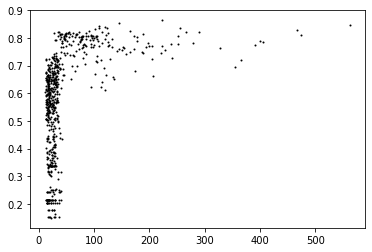

In [97]:
for i in range(5):
    plt.plot(bayes[:,1+3*i],bayes[:,0+3*i],'ko',markersize=1)


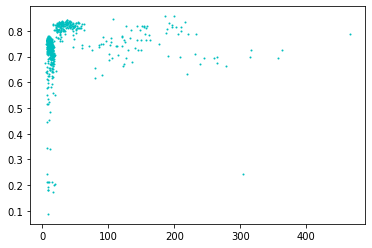

In [98]:
for i in range(5):
    plt.plot(ax[:,1+3*i],ax[:,0+3*i],'co',markersize=1)


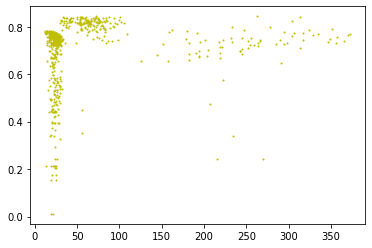

In [99]:
for i in range(5):
    plt.plot(ng[:,1+3*i],ng[:,0+3*i],'yo',markersize=1)


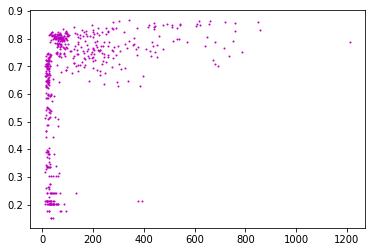

In [100]:
for i in range(4):
    plt.plot(bohb[:,1+3*i],bohb[:,0+3*i],'mo',markersize=1)


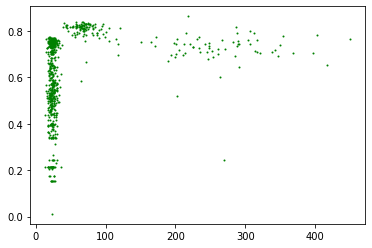

In [101]:
for i in range(5):
    plt.plot(ran[:,1+3*i],ran[:,0+3*i],'go',markersize=1)

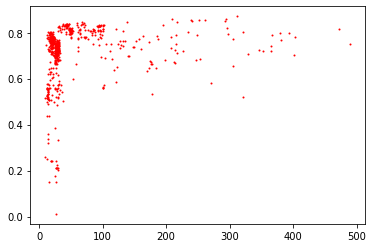

In [102]:
for i in range(5):
    plt.plot(zoo[:,1+3*i],1-zoo[:,0+3*i],'ro',markersize=1)

0.8236544140625002 0.8933172968749996 0.83646253125 0.88359453125 0.839143 0.8783049999999997 0.8102645078124999 0.8986248828125001
0.822983 0.8860873999999999
0.822983 0.885216


In [444]:
hyper = genfromtxt('hyper2.csv', delimiter=',')

bayes = genfromtxt('bayes2.csv', delimiter=',')

ax = genfromtxt('ax2.csv', delimiter=',')

ng = genfromtxt('ng2.csv', delimiter=',')

bohb = genfromtxt('bohb2.csv', delimiter=',')

ran = genfromtxt('ran2.csv', delimiter=',')

zoo =  genfromtxt('zoo2.csv', delimiter=',')

In [5]:
import pandas as pd
from numpy import genfromtxt
import numpy as np
hyper = genfromtxt('hyper2.csv', delimiter=',')

bayes = genfromtxt('bayes2.csv', delimiter=',')

ax = genfromtxt('ax2.csv', delimiter=',')

ng = genfromtxt('ng2.csv', delimiter=',')

bohb = genfromtxt('bohb2.csv', delimiter=',')

ran = genfromtxt('ran2.csv', delimiter=',')

zoo =  genfromtxt('zoo2.csv', delimiter=',')


def san(a):
    t = 0
    for j in range(5-(a.shape==bohb.shape)):
        a[:,2*j] = a[:,2*j+t,]
        t+=1
        a[:,2*j+1] = a[:,2*j+t+1]
def minof(a):
    for j in range(5-(a.shape==bohb.shape)):
        ma = 0;
        ta = 0;
        for i in range(128):
            if(ma<a[i,2+j*3]):
                ta = a[i,0+j*3]
            ma = max(ma,a[i,2+j*3]) 
            a[i,2+j*3] = ma
            a[i,0+j*3] = ta
        
def all(x):
    minof(x)
    san(x)
    return x[:,0:10]
        
hyper = all(hyper[::-1,])
bayes = all(bayes[::-1,])
ng = all(ng)
ax = all(ax)
bohb = all(bohb)[:,0:8]
ran = all(ran)

correctzoopt(zoo)

zoo = all(zoo)

def correctzoopt(x):
    for j in range(5):
        x[:,3*j+0] = 1-x[:,3*j+0]
        
        
        
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
import matplotlib.pyplot as plt

def maxof(a):
    for j in range(4):
        ma = 10000;
        ta = 10000;
        for i in range(256):
            if(ma>a[i,2*j+1]):
                ta = a[i,2*j]
            ma = min(ma,a[i,2*j+1]) 
            a[i,2*j+1] = ma
            a[i,2*j] = ta

def getall(a):
    f = [b for b in a[:,::2].mean(1)]
    g = [b for b in a[:,1::2].mean(1)]
    return (f, a[:,::2].std(1)/2, g,
                a[:,1::2].std(1)/2)
def getallI(a):
    t = np.arange(256)

    return (InterpolatedUnivariateSpline(t,a[:,::2].mean(1))(t), 
            InterpolatedUnivariateSpline(t,a[:,::2].std(1))(t)/4, 
            InterpolatedUnivariateSpline(t,a[:,1::2].mean(1))(t),
            InterpolatedUnivariateSpline(t, a[:,1::2].std(1))(t)/4)
           


        

In [6]:

def getmax(a):
    b,c,d,e = getall(a)
    return b[np.argmax(d)]


print(getmax(hyper))
print(getmax(bayes))
print(getmax(ax))
print(getmax(ng))
print(getmax(bohb))
print(getmax(ran))
print(getmax(zoo))

0.851736
0.8258682
0.8322516
0.8284853999999999
0.8523637500000001
0.8329594
0.8260818000000001


(128,)


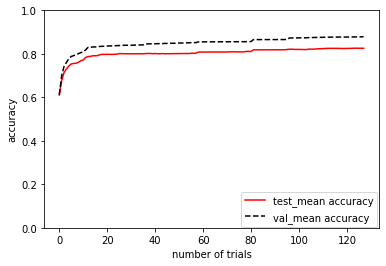

<Figure size 432x288 with 0 Axes>

In [438]:
t = np.arange(128)
mean_test_1,std_test_1,mean_val_1,std_val_1 = getall(hyper)
[mean_test_2,std_test_2,mean_val_2,std_val_2] = getall(bayes)
[mean_test_3,std_test_3,mean_val_3,std_val_3] = getall(ax)
[mean_test_4,std_test_4,mean_val_4,std_val_4] = getall(ng)
[mean_test_5,std_test_5,mean_val_5,std_val_5] = getall(bohb)
[mean_test_6,std_test_6,mean_val_6,std_val_6] = getall(ran)
[mean_test_7,std_test_7,mean_val_7,std_val_7] = getall(zoo)

all_m_t=np.array((mean_test_1,mean_test_2,mean_test_3,mean_test_4,
                        mean_test_5,mean_test_6,mean_test_7))
all_m_t = all_m_t.mean(0)

all_m=np.array((mean_val_1,mean_val_2,mean_val_3,mean_val_4,
                        mean_val_5,mean_val_6,mean_val_7))
all_m = all_m.mean(0)
print(all_m.shape)
plt.plot(t, all_m_t, 'r-',label="test_mean accuracy")
plt.plot(t, all_m, 'k--',label="val_mean accuracy")

#plt.fill_between(t, mean-std, mean+std, alpha = 0.5)


#plt.plot(t, meant, 'k-',label="BayesOpt")

#plt.fill_between(t, meant-stdt, meant+stdt, alpha = 0.5)

#plt.plot(t, ZZ1, '',label="inversedZoopt")
axes = plt.gca()
axes.set_ylim(0,1)
axes.set_xlabel('number of trials')
axes.set_ylabel('accuracy')
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 1)
plt.savefig('113.png')

fig = plt.figure()
plt.show()

In [2]:
plt.plot(t, mean_test_1, 'r-',label="HyperOpt")
plt.plot(t, mean_test_2, 'c-',label="BayesOpt")
plt.plot(t, mean_test_3, 'b-',label="Ax")
plt.plot(t, mean_test_4, 'g-',label="NeverGrad")
plt.plot(t, mean_test_5, 'k-',label="BOHB")
plt.plot(t, mean_test_6, 'm-',label="Random")
plt.plot(t, mean_test_7, 'y-',label="Zoopt")

axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
#plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 3)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('test accuracy')
plt.savefig('new/1.png')

#plt.title(r'\underline{Validation loss}:')
fig = plt.figure()
plt.show()

NameError: name 'plt' is not defined

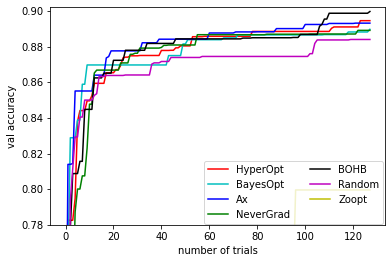

<Figure size 432x288 with 0 Axes>

In [440]:
plt.plot(t, mean_val_1, 'r-',label="HyperOpt")
plt.plot(t, mean_val_2, 'c-',label="BayesOpt")
plt.plot(t, mean_val_3, 'b-',label="Ax")
plt.plot(t, mean_val_4, 'g-',label="NeverGrad")
plt.plot(t, mean_val_5, 'k-',label="BOHB")
plt.plot(t, mean_val_6, 'm-',label="Random")
plt.plot(t, mean_val_7, 'y-',label="Zoopt")

axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('val accuracy')
plt.savefig('new/2.png')

#plt.title(r'\underline{Validation loss}:')
fig = plt.figure()
plt.show()

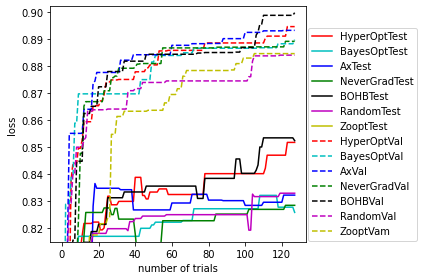

<Figure size 432x288 with 0 Axes>

In [424]:
plt.plot(t, mean_test_1, 'r-',label="HyperOptTest")
plt.plot(t, mean_test_2, 'c-',label="BayesOptTest")
plt.plot(t, mean_test_3, 'b-',label="AxTest")
plt.plot(t, mean_test_4, 'g-',label="NeverGradTest")
plt.plot(t, mean_test_5, 'k-',label="BOHBTest")
plt.plot(t, mean_test_6, 'm-',label="RandomTest")
plt.plot(t, mean_test_7, 'y-',label="ZooptTest")
plt.plot(t, mean_val_1, 'r--',label="HyperOptVal")
plt.plot(t, mean_val_2, 'c--',label="BayesOptVal")
plt.plot(t, mean_val_3, 'b--',label="AxVal")
plt.plot(t, mean_val_4, 'g--',label="NeverGradVal")
plt.plot(t, mean_val_5, 'k--',label="BOHBVal")
plt.plot(t, mean_val_6, 'm--',label="RandomVal")
plt.plot(t, mean_val_7, 'y--',label="ZooptVam")

axes = plt.gca()
axes.set_ylim(0.815,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(1.005,0.005 ), loc='lower left', borderaxespad=0.,ncol = 1)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('loss')
#plt.title(r'\underline{Validation loss}:')
plt.tight_layout()
plt.savefig('116.png')
fig = plt.figure()

plt.show()

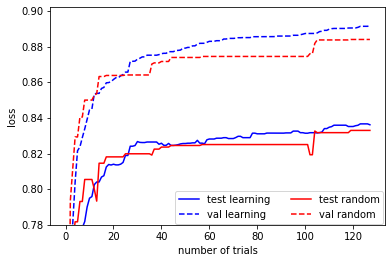

<Figure size 432x288 with 0 Axes>

In [383]:
all_m_t=np.array((mean_test_1,mean_test_2,mean_test_3,mean_test_4,
                        mean_test_5,mean_test_7))
all_m_t = all_m_t.mean(0)

all_m=np.array((mean_val_1,mean_val_2,mean_val_3,mean_val_4,
                        mean_val_5,mean_val_7))
all_m = all_m.mean(0)

plt.plot(t, all_m_t, 'b-',label="test learning")

plt.plot(t, all_m, 'b--',label="val learning")

plt.plot(t, mean_test_6, 'r-',label="test random")

plt.plot(t, mean_val_6, 'r--',label="val random")


#plt.fill_between(t, mean-std, mean+std, alpha = 0.5)


#plt.plot(t, meant, 'k-',label="BayesOpt")

#plt.fill_between(t, meant-stdt, meant+stdt, alpha = 0.5)

#plt.plot(t, ZZ1, '',label="inversedZoopt")
axes = plt.gca()
axes.set_ylim(0.78,0.902)
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('loss')
#plt.title(r'\underline{Validation loss}:')
plt.savefig('117.png')

fig = plt.figure()
plt.show()

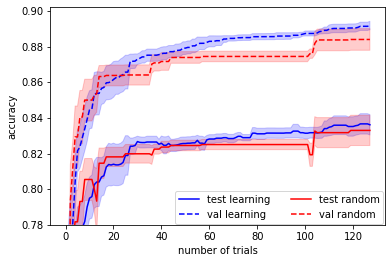

<Figure size 432x288 with 0 Axes>

In [387]:
all_m_t1=np.array((mean_test_1,mean_test_2,mean_test_3,mean_test_4,
                        mean_test_5,mean_test_7))
all_m_t = all_m_t1.mean(0)
all_m_s = all_m_t1.std(0)/2

all_m1=np.array((mean_val_1,mean_val_2,mean_val_3,mean_val_4,
                        mean_val_5,mean_val_7))
all_m = all_m1.mean(0)
all_ms = all_m1.std(0)/2

plt.plot(t, all_m_t, 'b-',label="test learning")
plt.fill_between(t, all_m_t-all_m_s,  all_m_t+all_m_s, alpha = 0.2,color='b')

plt.plot(t, all_m, 'b--',label="val learning")
plt.fill_between(t, all_m-all_ms,  all_m+all_ms, alpha = 0.2,color='b')

plt.plot(t, mean_test_6, 'r-',label="test random")
plt.fill_between(t, mean_test_6-std_test_6,  mean_test_6+std_test_6, alpha = 0.2,color='r')

plt.plot(t, mean_val_6, 'r--',label="val random")
plt.fill_between(t, mean_val_6-std_val_6,  mean_val_6+std_val_6, alpha = 0.2,color='r')


#plt.fill_between(t, mean-std, mean+std, alpha = 0.5)


#plt.plot(t, meant, 'k-',label="BayesOpt")

#plt.fill_between(t, meant-stdt, meant+stdt, alpha = 0.5)

#plt.plot(t, ZZ1, '',label="inversedZoopt")
axes = plt.gca()
axes.set_ylim(0.78,0.902)
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('accuracy')
plt.savefig('new/3.png')

#plt.title(r'\underline{Validation loss}:')
fig = plt.figure()
plt.show()

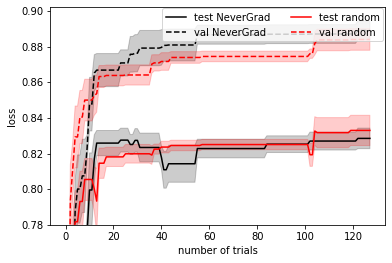

<Figure size 432x288 with 0 Axes>

In [385]:

plt.plot(t, mean_test_4, 'k-',label="test NeverGrad")
plt.fill_between(t, mean_test_4-std_test_4,  mean_test_4+std_test_4, alpha = 0.2,color='k')

plt.plot(t, mean_val_4, 'k--',label="val NeverGrad")
plt.fill_between(t, mean_val_4-std_val_4,  mean_val_4+std_val_4, alpha = 0.2,color='k')

plt.plot(t, mean_test_6, 'r-',label="test random")
plt.fill_between(t, mean_test_6-std_test_6,  mean_test_6+std_test_6, alpha = 0.2,color='r')

plt.plot(t, mean_val_6, 'r--',label="val random")
plt.fill_between(t, mean_val_6-std_val_6,  mean_val_6+std_val_6, alpha = 0.2,color='r')


axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.995 ), loc='upper right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('loss')
plt.savefig('109.png')

fig = plt.figure()
plt.show()

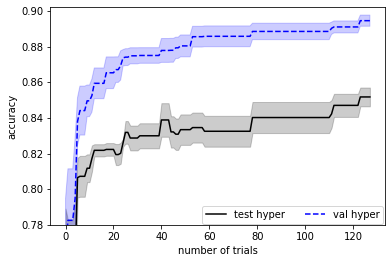

<Figure size 432x288 with 0 Axes>

In [389]:
plt.plot(t, mean_test_1, 'k-',label="test hyper")
plt.fill_between(t, mean_test_1-std_test_1,  mean_test_1+std_test_1, alpha = 0.2,color='k')

plt.plot(t, mean_val_1, 'b--',label="val hyper")
plt.fill_between(t, mean_val_1-std_val_1,  mean_val_1+std_val_1, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('accuracy')
plt.savefig('new/4.png')

fig = plt.figure()
plt.show()

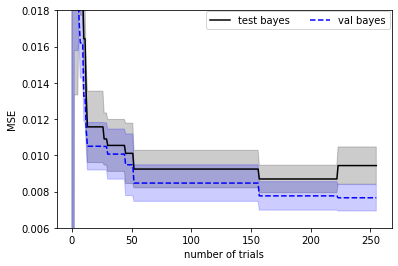

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(t, mean_test_2, 'k-',label="test bayes")
plt.fill_between(t, mean_test_2-std_test_2,  mean_test_2+std_test_2, alpha = 0.2,color='k')

plt.plot(t, mean_val_2, 'b--',label="val bayes")
plt.fill_between(t, mean_val_2-std_val_2,  mean_val_2+std_val_2, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.995 ), loc='upper right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('MSE')
plt.savefig('new/4.png')

fig = plt.figure()
plt.show()

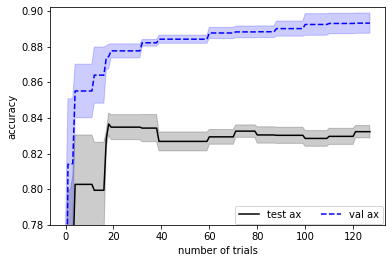

<Figure size 432x288 with 0 Axes>

In [396]:
plt.plot(t, mean_test_3, 'k-',label="test ax")
plt.fill_between(t, mean_test_3-std_test_3,  mean_test_3+std_test_3, alpha = 0.2,color='k')

plt.plot(t, mean_val_3, 'b--',label="val ax")
plt.fill_between(t, mean_val_3-std_val_3,  mean_val_3+std_val_3, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('accuracy')
plt.savefig('new/5.png')

fig = plt.figure()
plt.show()

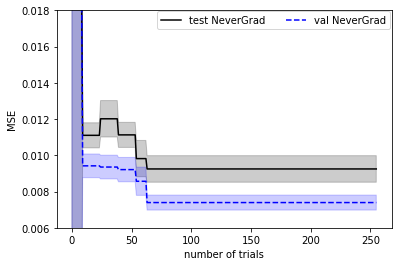

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(t, mean_test_4, 'k-',label="test NeverGrad")
plt.fill_between(t, mean_test_4-std_test_4,  mean_test_4+std_test_4, alpha = 0.2,color='k')

plt.plot(t, mean_val_4, 'b--',label="val NeverGrad")
plt.fill_between(t, mean_val_4-std_val_4,  mean_val_4+std_val_4, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.006,0.018)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.995 ), loc='upper right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('MSE')
plt.savefig('new/124.png')

fig = plt.figure()
plt.show()

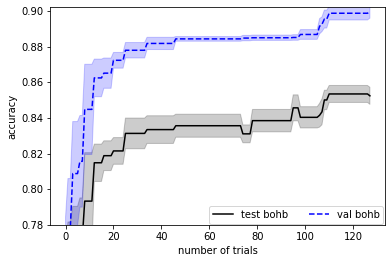

<Figure size 432x288 with 0 Axes>

In [393]:
plt.plot(t, mean_test_5, 'k-',label="test bohb")
plt.fill_between(t, mean_test_5-std_test_5,  mean_test_5+std_test_5, alpha = 0.2,color='k')

plt.plot(t, mean_val_5, 'b--',label="val bohb")
plt.fill_between(t, mean_val_5-std_val_5,  mean_val_5+std_val_5, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('accuracy')
plt.savefig('new/6.png')

fig = plt.figure()
plt.show()

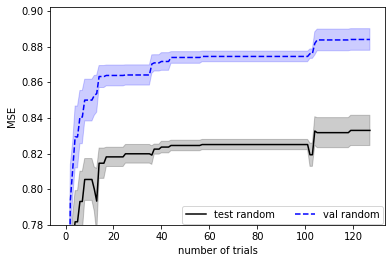

<Figure size 432x288 with 0 Axes>

In [395]:
plt.plot(t, mean_test_6, 'k-',label="test random")
plt.fill_between(t, mean_test_6-std_test_6,  mean_test_6+std_test_6, alpha = 0.2,color='k')

plt.plot(t, mean_val_6, 'b--',label="val random")
plt.fill_between(t, mean_val_6-std_val_6,  mean_val_6+std_val_6, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.78,0.902)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.005 ), loc='lower right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('MSE')
plt.savefig('new/7.png')

fig = plt.figure()
plt.show()

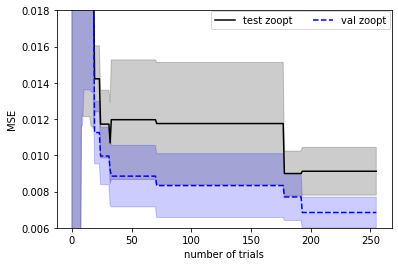

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(t, mean_test_7, 'k-',label="test zoopt")
plt.fill_between(t, mean_test_7-std_test_7,  mean_test_7+std_test_7, alpha = 0.2,color='k')

plt.plot(t, mean_val_7, 'b--',label="val zoopt")
plt.fill_between(t, mean_val_7-std_val_7,  mean_val_7+std_val_7, alpha = 0.2,color='b')


axes = plt.gca()
axes.set_ylim(0.006,0.018)
#plt.axis([0, 260,0 ,0.85 ])
plt.legend(bbox_to_anchor=(0.995,0.995 ), loc='upper right', borderaxespad=0.,ncol = 2)
#plt.yscale('log')
axes.set_xlabel('number of trials')
axes.set_ylabel('MSE')
plt.savefig('new/127.png')

fig = plt.figure()
plt.show()